Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=0.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.94 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.41 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=0.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=1.34 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

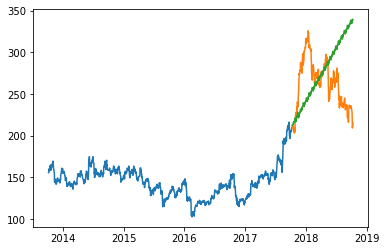

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

df = pd.read_csv('test.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])